# The Popularity of Online News

The objective of this dataset is to analyse the popularity of different online news articles and determine what makes them popular using their share rate as an indicator.


## Importing Necessary Libraries



In [4]:
import pandas as pd
import seaborn as sb
import matplotlib as mplt
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

The code below is used to adjust the parameters of matplotlib so as to better display the different visualisation methods later on.

In [5]:
plt.style.use("default")
plt.gcf().subplots_adjust(bottom=0.15)

<Figure size 640x480 with 0 Axes>

## Cleaning the Dataset

Before starting to visualise the data we first need to import and look at the data given to us. We import the dataset into a pandas dataframe and use the describe function to get a quick overview of what we're working with. Looking at the count we can see that there a total of 39644 instances, this is different to the 39797 indicated in the names file that came with the dataset.

In [6]:
df = pd.read_csv(r"C:\Users\cg170794\Documents\ESILV\Python 4 Projet\OnlineNewsPopularity.csv")
print(df.describe())

          timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.530545   
std      214.163767         2.114037         471.107508          0.137111   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470858   
50%      339.000000        10.000000         409.000000          0.539216   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000          1.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.970201                   0.672790     10.883690   
std             0.170017                   0.154039     11.332017   
min             0.000000      

We print the names of all the columns so that we have an overview of the data. There are a total of  61 attributes, 58 predictive attributes, 2 non-predictive and the goal field (shares). Noticing the "data_channel_is..." and "weekday_is_..." attributes we decided that we preffered to assign weekdays and Article Types to each instance instead of the long list of bools. This allows for easier groupings and data visualisation later on.

In [7]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

To achieve this we create two functions, one for the weekdays and another for the article types that we will apply to the dataset.

In [8]:
def weekdays(x):
  if x[" weekday_is_monday"] == 1:
    return "Monday"
  elif x[" weekday_is_tuesday"] == 1:
    return "Tuesday"
  elif x[" weekday_is_wednesday"] == 1:
    return "Wednesday"
  elif x[" weekday_is_thursday"] == 1:
    return "Thursday"
  elif x[" weekday_is_friday"] == 1:
    return "Friday"
  elif x[" weekday_is_saturday"] == 1:
    return "Saturday"
  elif x[" weekday_is_sunday"] == 1:
    return "Sunday"

In [9]:
def ArticleType(x):
  if x[" data_channel_is_lifestyle"] == 1:
    return "Lifestyle"
  elif x[" data_channel_is_entertainment"] == 1:
    return "Entertainment"
  elif x[" data_channel_is_bus"] == 1:
    return "Business"
  elif x[" data_channel_is_socmed"] == 1:
    return "Social Media"
  elif x[" data_channel_is_world"] == 1:
    return "World"
  elif x[" data_channel_is_tech"] == 1:
    return "Tech"
  else:
    return "Other"


In [10]:
df["Weekday"] = df.apply(weekdays,axis=1)

In [11]:
df["Article Type"] = df.apply(ArticleType,axis=1)

We check the dataframe to ensure that the functions have worked as they should.

In [12]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Weekday,Article Type
0,http://mashable.com/2014/08/18/ukraine-civilia...,142,9,1570,0.446497,0.663694,0.414013,11,10,51,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5900,Tuesday,Entertainment
1,http://mashable.com/2013/03/03/superheroic-let...,676,7,30,1.000000,1.000000,1.000000,2,1,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,11700,Sunday,Other
2,http://mashable.com/2013/03/04/polar-bear-cub-...,675,8,27,1.000000,1.000000,1.000000,2,0,0,...,-0.191667,-0.300000,-0.083333,0.250000,-0.083333,0.250000,0.083333,1000,Monday,Other
3,http://mashable.com/2014/10/23/marlins-man-wor...,76,10,24,1.000000,1.000000,1.000000,0,0,1,...,-0.220833,-0.291667,-0.150000,0.500000,0.250000,0.000000,0.250000,1000,Friday,Other
4,http://mashable.com/2013/03/10/magic-trick-hom...,669,11,49,0.979592,1.000000,1.000000,3,2,0,...,0.000000,0.000000,0.000000,0.800000,0.550000,0.300000,0.550000,2100,Sunday,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/26/holiday-decorat...,9,11,0,0.000000,0.000000,0.000000,0,0,0,...,0.000000,0.000000,0.000000,0.333333,0.250000,0.166667,0.250000,6100,Tuesday,Other
39640,http://mashable.com/2014/12/26/minority-author...,9,12,0,0.000000,0.000000,0.000000,0,0,0,...,0.000000,0.000000,0.000000,0.625000,0.400000,0.125000,0.400000,2300,Tuesday,Other
39641,http://mashable.com/2014/12/26/the-interview-b...,9,12,0,0.000000,0.000000,0.000000,0,0,14,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1600,Tuesday,World
39642,http://mashable.com/2014/12/26/toothpaste-fluo...,9,11,0,0.000000,0.000000,0.000000,0,0,21,...,0.000000,0.000000,0.000000,0.454545,0.136364,0.045455,0.136364,5700,Tuesday,World


We now want to check the type of every attibute as well as make sure there are no nulls.

In [13]:
df.dtypes

url                               object
 timedelta                         int64
 n_tokens_title                    int64
 n_tokens_content                  int64
 n_unique_tokens                 float64
                                  ...   
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                            int64
Weekday                           object
Article Type                      object
Length: 63, dtype: object

In [14]:
df.isnull().any()


url                              False
 timedelta                       False
 n_tokens_title                  False
 n_tokens_content                False
 n_unique_tokens                 False
                                 ...  
 abs_title_subjectivity          False
 abs_title_sentiment_polarity    False
 shares                          False
Weekday                          False
Article Type                     False
Length: 63, dtype: bool

After having verified that all the types align and that there are nulls we then decided to drop the "url" and "timedelta" variables as they have no purpose in the context of our datavisualation or prediction as they are non predictive.

In [15]:
df.drop(columns=['url'], axis=1,inplace=True)
df.drop(columns=[' timedelta'], axis=1,inplace=True)

## Visualising The Dataset

After having cleaned up or data we are now ready to start visualising. We decided to first look at the average shares per article type and per day.

In [16]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

<AxesSubplot:title={'center':'Average Shares by Article Type'}, xlabel='Article Type', ylabel='Average Shares'>

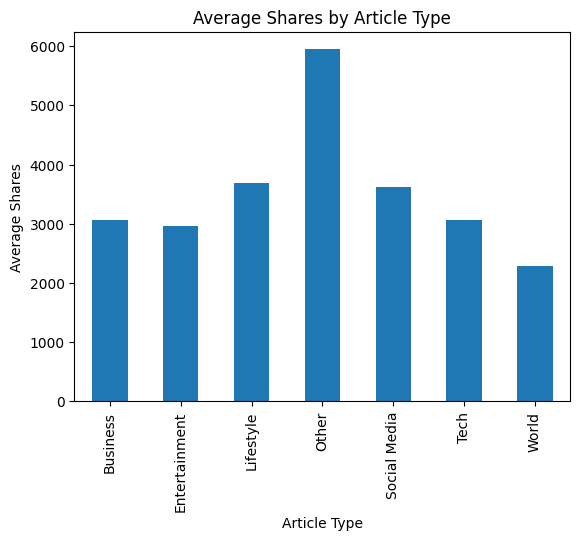

In [17]:
df.groupby("Article Type")[" shares"].mean().plot.bar(title="Average Shares by Article Type", ylabel = "Average Shares")

The first thing one can notice is that the Other category is far ahead of every other category however this is not unusual as the other category contains everything that doesn't fit leading it to be biased. Looking at the remain categories one can see that the Lifestyle and Social Media categories are ahead. This led us to hypothesis that these categories are more accessible. To verify this hypothesis we would later check the complexity of each category. 

<AxesSubplot:title={'center':'Average Shares by Day of Week'}, xlabel='Weekday', ylabel='Average Shares'>

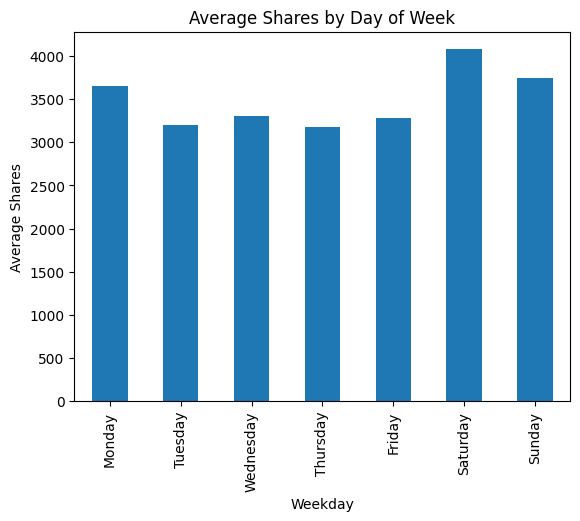

In [18]:
df.groupby("Weekday")[" shares"].mean().reindex(cats).plot.bar(title="Average Shares by Day of Week", ylabel = "Average Shares")

We notice immediately that people tend to share more on weekends than on weekdays. Our hypothesis is that more people have more time on weekends to read online articles leading to this bias.

Next we wanted to see the average shares per article type per day. To do this we pivot our dataframe keeping only the necessary columns and create a heatmap of the data.

In [19]:
pivot = df.pivot_table(columns="Weekday",index="Article Type",values=" shares",aggfunc = "mean")

In [20]:


pivot = pivot[cats]
pivot

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Article Type,,,,,,,
Business,3887.436253,2932.335871,2676.551534,2885.192058,2363.770433,4426.897119,3543.784257
Entertainment,2931.036082,2708.032685,2854.619305,2882.212835,3000.946502,3416.400000,3810.951493
Lifestyle,4345.711180,4152.494012,3173.180412,3500.268156,3025.868852,4062.450549,3790.376190
Other,6960.554444,5442.594959,6523.105263,5403.111615,5864.123188,6906.198113,4643.883212
Social Media,4010.442136,3503.290393,3508.509615,3092.168467,4012.879518,3508.711111,4525.350365
Tech,2821.483401,2883.409769,3362.784051,2744.542748,3050.812942,3615.453333,3935.686869
World,2456.053835,2220.134541,1879.787859,2394.008286,2228.411494,2760.202312,2605.483245


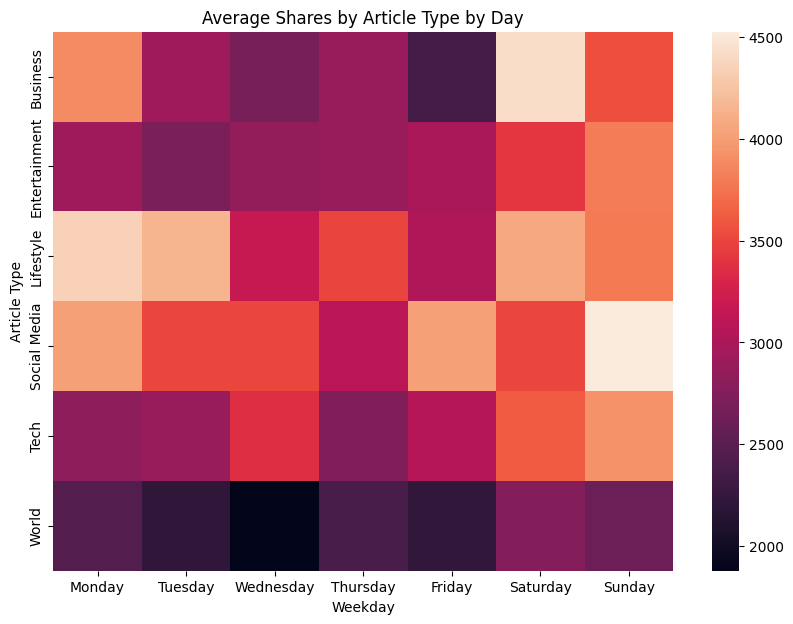

In [21]:
plt.figure(figsize = (10,7))
ax = sb.heatmap(pivot.drop("Other"))
ax.set_title("Average Shares by Article Type by Day")
plt.show()

We removed the other category from the heatmap because it was so far ahead of the others that is was adding a bias to the the colour scale and is not very interesting to visualise.

We can notice that there are more shares across the board during the weeking but the greates increase is in the business category. It is interesting to see which category performs the best on which day. A Social Media article on a sunday is likeley to perform very well and a world article on a wednesday is likely to work poorly.

In [22]:
df.groupby(' global_subjectivity')[' global_sentiment_polarity'].mean()

 global_subjectivity
0.000000    0.000000
0.022222    0.011111
0.062500    0.030000
0.066667    0.033333
0.089493   -0.079348
              ...   
0.922222   -0.106250
0.928571    0.528571
0.937500    0.420833
0.950000   -0.150000
1.000000    0.325000
Name:  global_sentiment_polarity, Length: 34501, dtype: float64

We wanted to see visualise the impact that the polarity and subjectivity of both the content and the title had on the amount off shares. To do this we used a 3D graph with the shares along the z axis and the polarity and subjectivity along the x and y axis. We decided to split the graph into three parts so as to better see the effects.

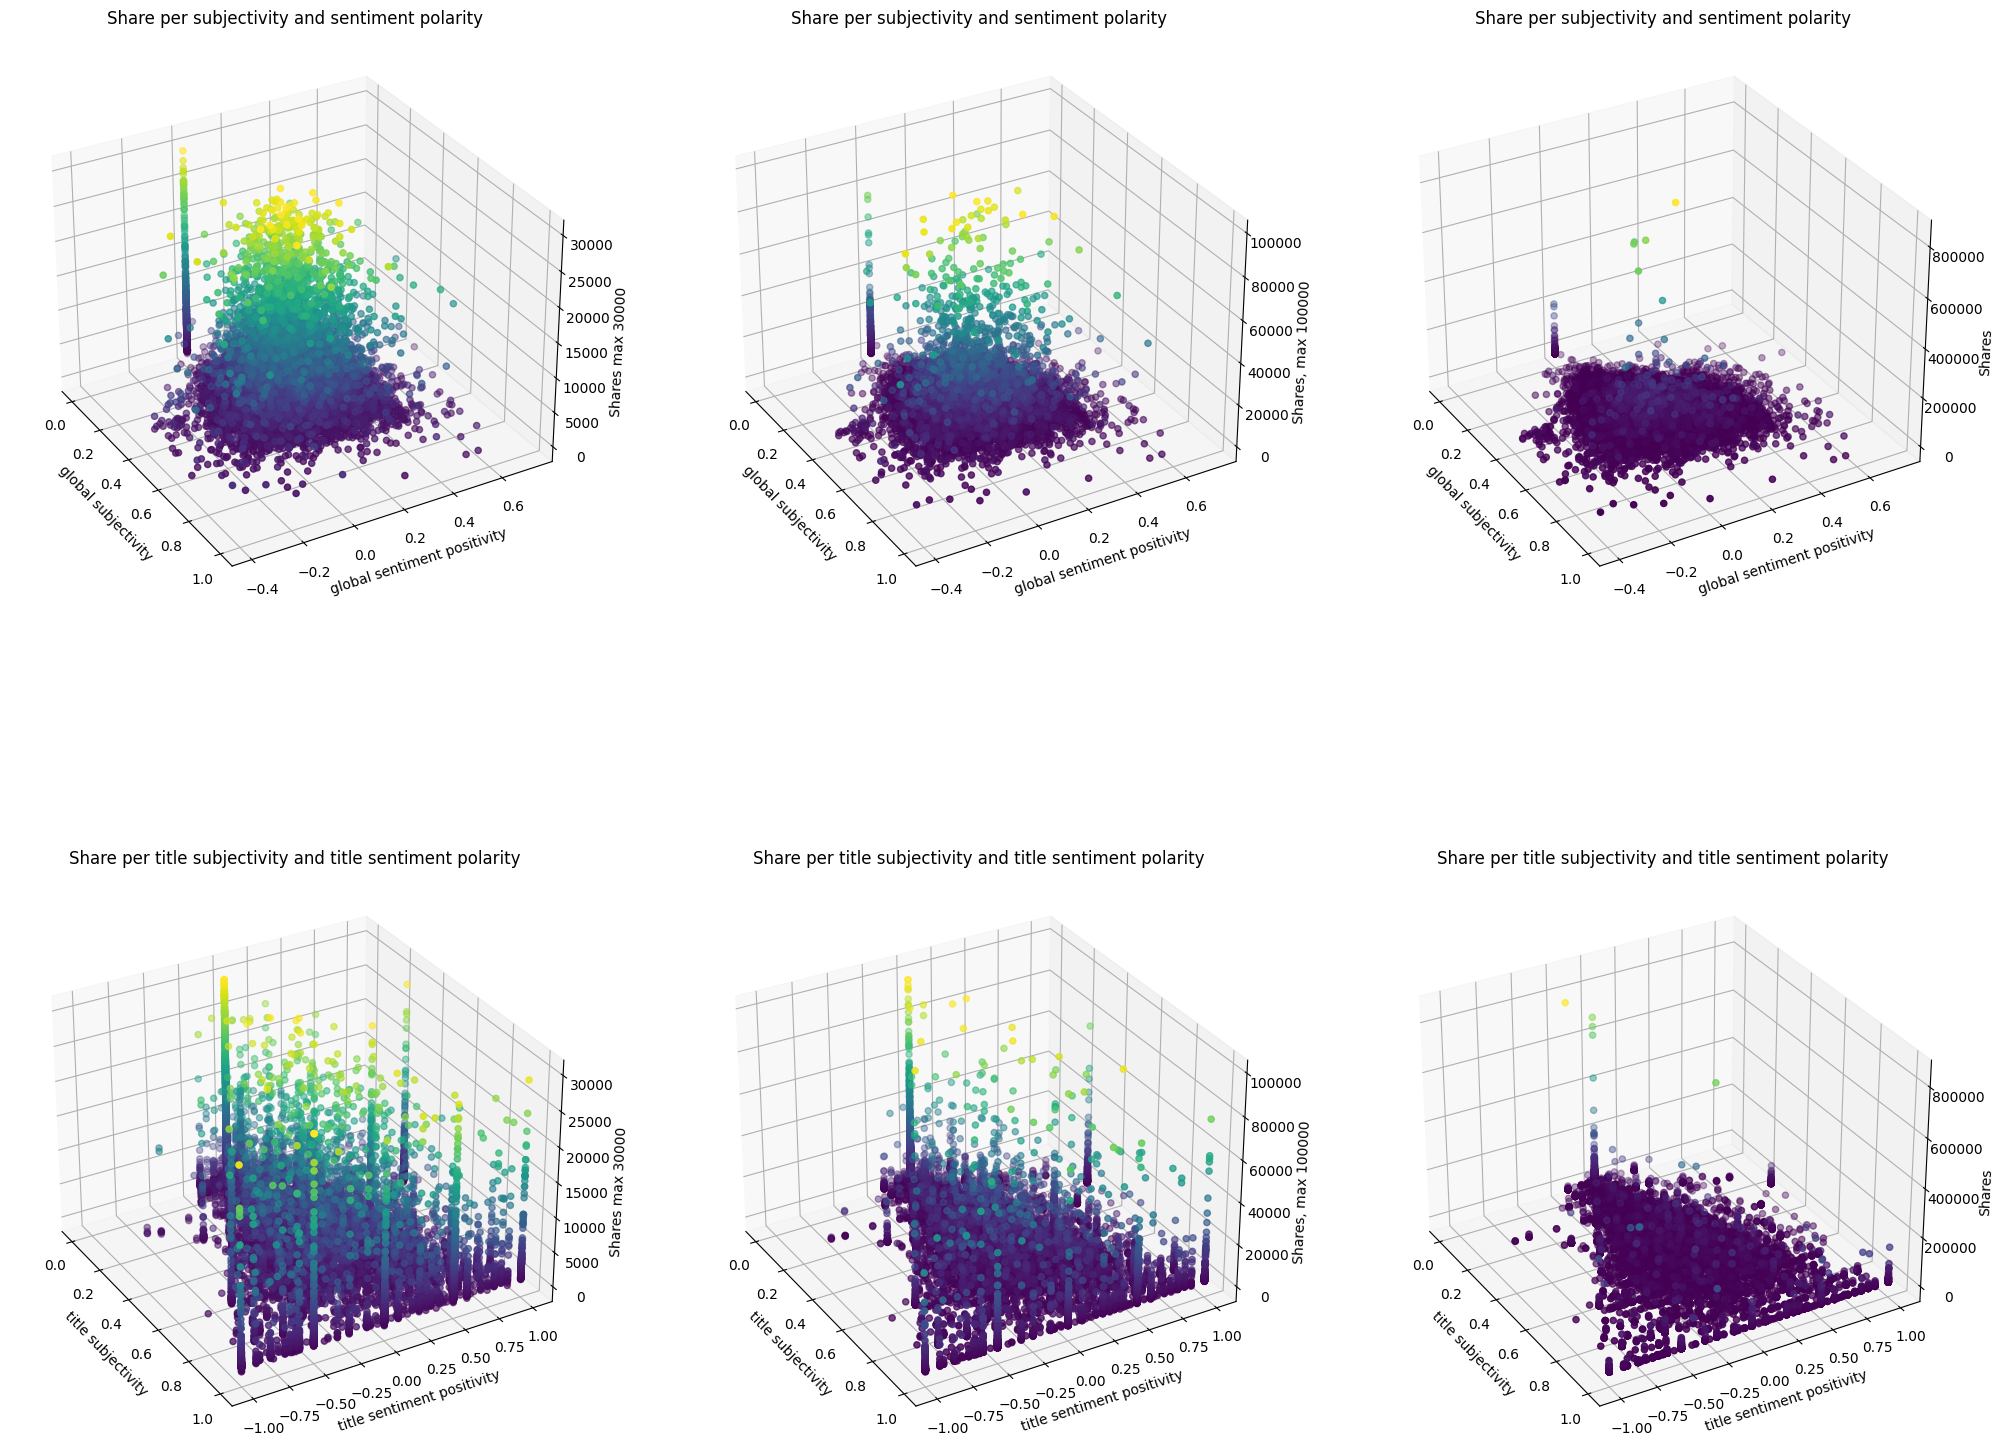

In [23]:
fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(2, 3, 1, projection='3d')
df_share=df[df[' shares'] < 30000]
xdata= df_share[' global_subjectivity']
ydata= df_share[' global_sentiment_polarity']
zdata = df_share[' shares']
ax.scatter(xdata, ydata, zdata, c=zdata, cmap='viridis')
ax.title.set_text('Share per subjectivity and sentiment polarity')
ax.set_xlabel('global subjectivity')
ax.set_ylabel('global sentiment positivity')
ax.set_zlabel('Shares max 30000')
ax.view_init(30, -30)
ax = fig.add_subplot(2, 3, 2, projection='3d')
df_share=df[df[' shares'] < 100000]
xdata= df_share[' global_subjectivity']
ydata= df_share[' global_sentiment_polarity']
zdata = df_share[' shares']
ax.scatter(xdata, ydata, zdata, c=zdata, cmap='viridis')
ax.title.set_text('Share per subjectivity and sentiment polarity')
ax.set_xlabel('global subjectivity')
ax.set_ylabel('global sentiment positivity')
ax.set_zlabel('Shares, max 100000')
ax.view_init(30, -30)
ax = fig.add_subplot(2, 3, 3, projection='3d')
ax.scatter(df[' global_subjectivity'],df[' global_sentiment_polarity'],df[' shares'],c=df[' shares'], cmap='viridis')
ax.title.set_text('Share per subjectivity and sentiment polarity')
ax.set_xlabel('global subjectivity')
ax.set_ylabel('global sentiment positivity')
ax.set_zlabel('Shares')
ax.view_init(30, -30)
ax = fig.add_subplot(2, 3, 4, projection='3d')
df_share=df[df[' shares'] < 30000]
xdata= df_share[' title_subjectivity']
ydata= df_share[' title_sentiment_polarity']
zdata = df_share[' shares']
ax.scatter(xdata,ydata,zdata,c=zdata, cmap='viridis')
ax.title.set_text('Share per title subjectivity and title sentiment polarity')
ax.set_xlabel('title subjectivity')
ax.set_ylabel('title sentiment positivity')
ax.set_zlabel('Shares max 30000')
ax.view_init(30, -30)
ax = fig.add_subplot(2, 3, 5, projection='3d')
df_share=df[df[' shares'] < 100000]
xdata= df_share[' title_subjectivity']
ydata= df_share[' title_sentiment_polarity']
zdata = df_share[' shares']
ax.scatter(xdata, ydata, zdata, c=zdata, cmap='viridis')
ax.title.set_text('Share per title subjectivity and title sentiment polarity')
ax.set_xlabel('title subjectivity')
ax.set_ylabel('title sentiment positivity')
ax.set_zlabel('Shares, max 100000')
ax.view_init(30, -30)
ax = fig.add_subplot(2, 3, 6, projection='3d')
ax.scatter(df[' title_subjectivity'],df[' title_sentiment_polarity'],df[' shares'],c=df[' shares'], cmap='viridis')
ax.title.set_text('Share per title subjectivity and title sentiment polarity')
ax.set_xlabel('title subjectivity')
ax.set_ylabel('title sentiment positivity')
ax.set_zlabel('Shares')
ax.view_init(30, -30)
plt.show()

As we can see the title seems to have little impact on the amount of shares as it is a rather homegenouse triangular prism. The triangular shape however indicates that a title can not be object and positive at the same time. We do however see a cone like shape on the graph representing the positivity and subjectivity of the content. This indicates that the more neutral and more positive article will recieve more shares. It is interesting to see that the content therefore has more impact on the amount of shares than the title when it is the title that will generate the first amount of clicks.


We wanted to see the amount of articles published by day and by category. This is interesting to visualise to see what is most available to people online.

<AxesSubplot:title={'center':'Amount of Articles by Article Type'}, xlabel='Article Type', ylabel='Amount of Articles'>

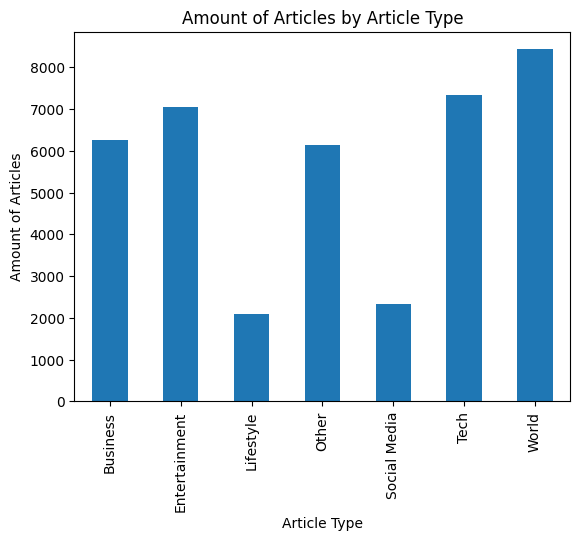

In [24]:
df.groupby("Article Type")[" shares"].count().plot.bar(title="Amount of Articles by Article Type", ylabel = "Amount of Articles")


<AxesSubplot:title={'center':'Amount of Articles by Day of Week'}, xlabel='Weekday', ylabel='Amount of Articles'>

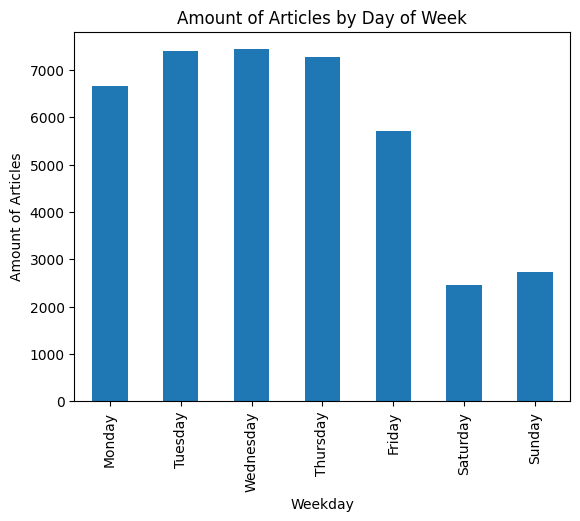

In [25]:
df.groupby("Weekday")[" shares"].count().reindex(cats).plot.bar(title="Amount of Articles by Day of Week", ylabel = "Amount of Articles")

Most of the articles are published during the week, this is understandable because this is when the authors work the most.


In [26]:
pivot2 = df.pivot_table(columns="Weekday",index="Article Type",values=" shares",aggfunc = "count")

In [27]:
pivot2 = pivot2[cats]

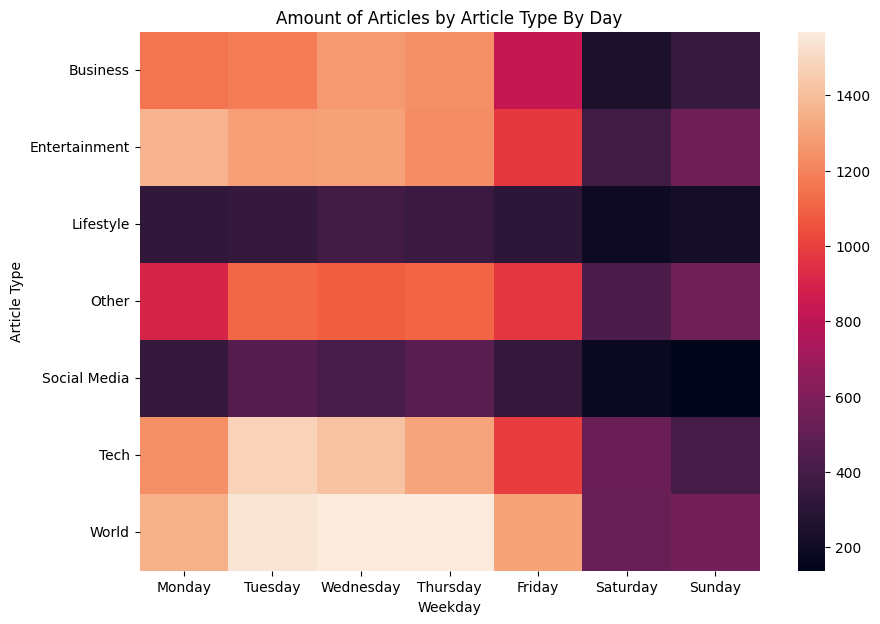

In [28]:
fig = plt.figure(figsize = (10,7))
ax = sb.heatmap(pivot2)
ax.set_title("Amount of Articles by Article Type By Day")
plt.show()

As shown above most articles are in the world article. With the least being in the lifestyle and social media categories.

It's interesting to compare it with the amount of shares because it's the opposite.


We wanted to know if the complexity of an article had an impact on the amount of shares. We used the rate of unique tokens( or words) to determine the complexity of the article. This is called the Hapax Richness, which is an indicator of the complexity of a text using the rate at which unique words appear in a text. One has to be wary though because a text with very few words will a very high Hapax Richness.

When calculating this we noticed an outlier that had a complexity of 701.0. This is impossible, looking at the dataset we noticed a line that we supposed had not been divided. We therefore went ahead and calculated the missing rates ourself. 

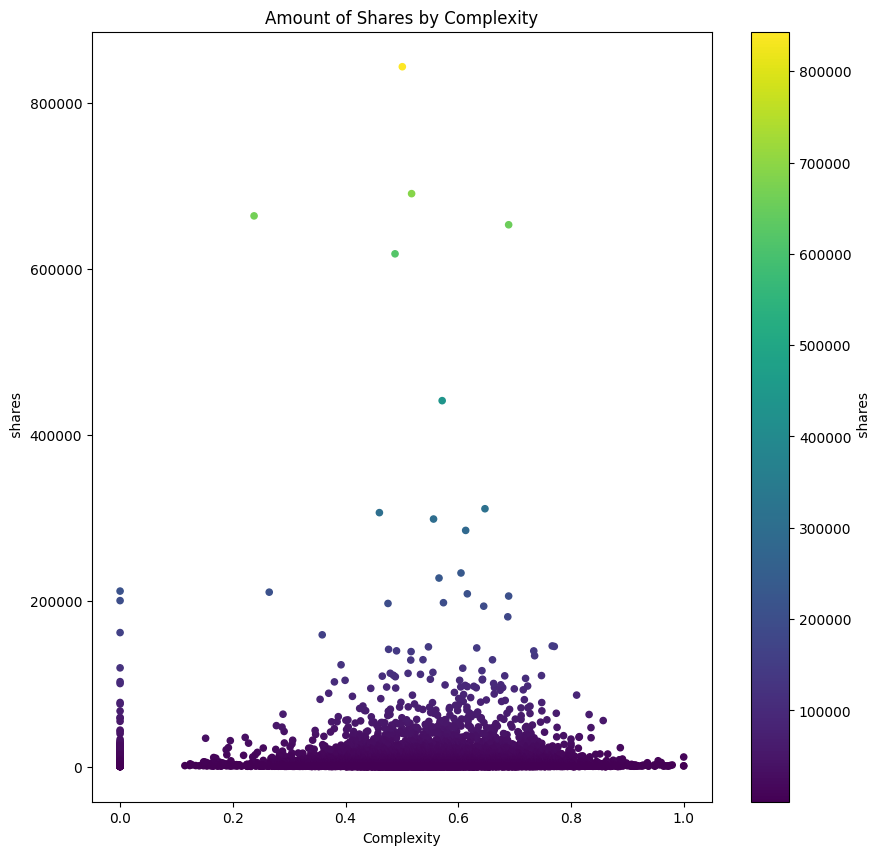

In [29]:
ax = df.plot.scatter(y = " shares", x = " n_unique_tokens",c=" shares",cmap='viridis',title="Amount of Shares by Complexity", xlabel = 'Complexity',figsize=(10,10))
ax.set_xlabel("Complexity")
plt.show()

The articles that are shared the most are those that have a mid complexity. One can think that the complexity is what make the article interesting but it has to appeal to a large audience in order to get more shares. Therefore a mid range complexity is best.


We now need to know the complexity of each article type to see if the number of shares for each type is because a type is easier to understand than another.


<AxesSubplot:title={'center':'Average Complexity per article type'}, xlabel='Article Type', ylabel='Complexity'>

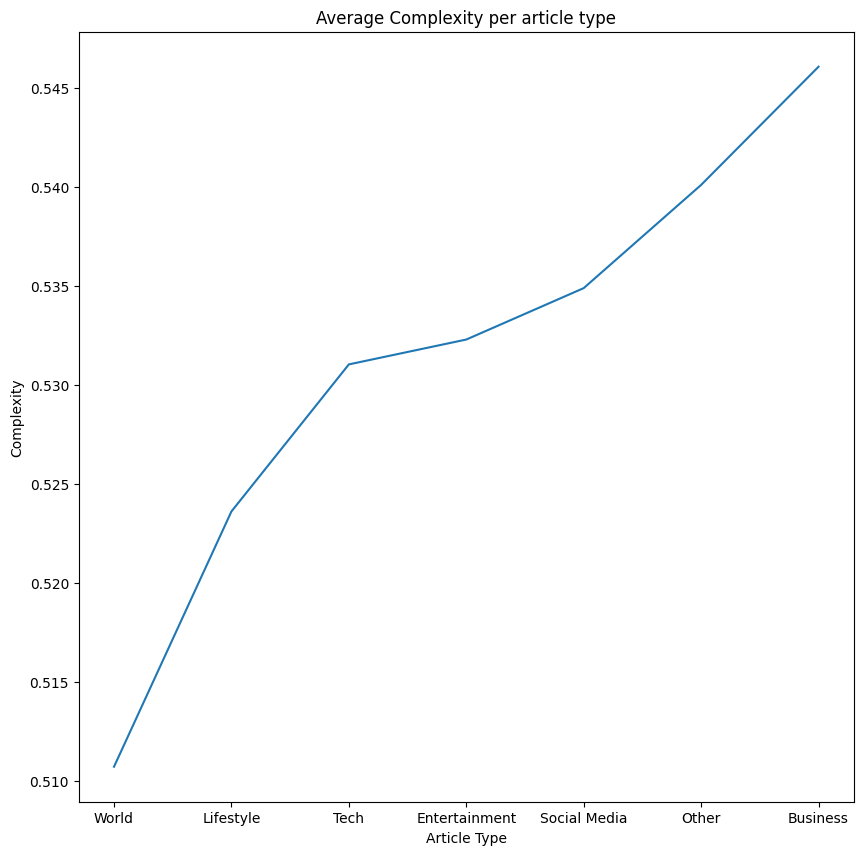

In [30]:
df.groupby("Article Type")[" n_unique_tokens"].mean().sort_values().plot(figsize=(10,10), title="Average Complexity per article type", ylabel = 'Complexity')


We expected this result, the business category is the most complex because the articles require a knowledge of the basic business and economic terms in order to understand them.
The complexity remains rather close for each category.


What also wanted to know if the amount of images or videos influenced the amount of shares.


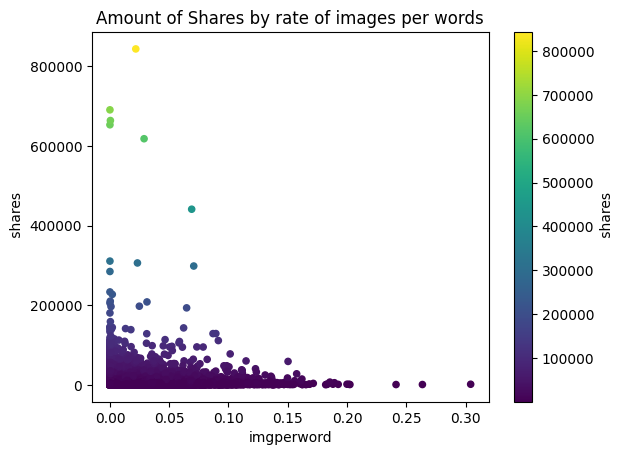

In [31]:
df['imgperword']=df[" num_imgs"]/df[' n_tokens_content']
df.plot.scatter(y = " shares", x = 'imgperword',c=" shares",cmap='viridis',title="Amount of Shares by rate of images per words")
ax.set_xlabel('Rate Images/Words')
plt.show()

This plot show us there can be no images and people will still share it a lot. It's also better if there isn't too many else it will be shared less.

Now to see whether videos have a larger impact.

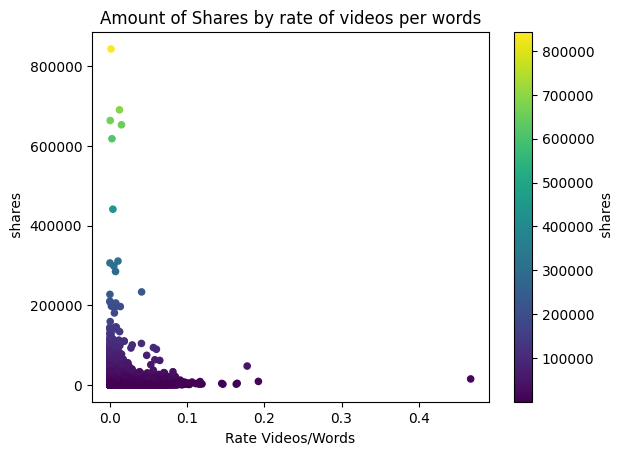

In [32]:
df['vidperword']=df[" num_videos"]/df[' n_tokens_content']
ax = df.plot.scatter(y = " shares", x = 'vidperword',c=" shares",cmap='viridis',title="Amount of Shares by rate of videos per words")
ax.set_xlabel('Rate Videos/Words')
plt.show()

It's clearly shown that articles don't need to have videos or at least not a lot. 
People will share an article based on the content that can easily be seen and not on videos

##Conclusion

In conclusion we can say that the Social Media and Lifestyle articles are the most shared on average and world category has the lowest average. That most articles are written during the week but those written on the weekend are the most shared. The title of the article doesn't have much importance on the text and fewer images and videos are better. However there is evidence that a positive and objective article were get more shares.

## Modeling

The goal of this dataset is to predict whether an article is sucessful without using the amount of shares an article has. To do this we will use the scikit-learn library. First of all we have to copy the dataset used for visualisation and modify it a little so as to obtain the best accuracy possible. The changes are mainly changing the weekdays and categories for ints. As well as categorising the shares into popular and unpopular for the classification.

In [33]:
dataset = df.copy()
dataset.drop(columns=[' data_channel_is_lifestyle',' data_channel_is_entertainment',' data_channel_is_bus',' data_channel_is_socmed',' data_channel_is_tech',' data_channel_is_world',' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday',' weekday_is_thursday',' weekday_is_friday',' weekday_is_saturday',' weekday_is_sunday'], axis=1,inplace=True)


In [34]:
def weekdaytoint(x):
  if x["Weekday"]== "Monday":
    return 1
  if x["Weekday"]== "Tuesday":
    return 2
  if x["Weekday"]== "Wednesday":
    return 3
  if x["Weekday"]== "Thursday":
    return 4
  if x["Weekday"]== "Friday":
    return 5
  if x["Weekday"]== "Saturday":
    return 6
  if x["Weekday"]== "Sunday":
    return 7
  else:
    return 0

def categorytoint(x):
  if x["Article Type"]== "World":
    return 1
  if x["Article Type"]== "Tech":
    return 2
  if x["Article Type"]== "Lifestyle":
    return 3
  if x["Article Type"]== "Entertainment":
    return 4
  if x["Article Type"]== "Social Media":
    return 5
  if x["Article Type"]== "Business":
    return 6
  else:
    return 0
  
  

In [35]:
dataset[' shares']=np.where(dataset[' shares']>= 1400,1,0)

In [36]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.inspection import permutation_importance
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


In [37]:
dataset["WeekdayInt"] = dataset.apply(weekdaytoint,axis=1)
dataset["CategoryInt"] = dataset.apply(categorytoint,axis=1)

In [38]:
dataset.drop(["Weekday","Article Type","imgperword",	"vidperword"],axis=1,inplace=True)

In [39]:
dataset

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,WeekdayInt,CategoryInt
0,9,1570,0.446497,0.663694,0.414013,11,10,51,0,4.696178,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,2,4
1,7,30,1.000000,1.000000,1.000000,2,1,0,0,5.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1,7,0
2,8,27,1.000000,1.000000,1.000000,2,0,0,1,5.296296,...,-0.191667,-0.300000,-0.083333,0.250000,-0.083333,0.250000,0.083333,0,1,0
3,10,24,1.000000,1.000000,1.000000,0,0,1,0,4.208333,...,-0.220833,-0.291667,-0.150000,0.500000,0.250000,0.000000,0.250000,0,5,0
4,11,49,0.979592,1.000000,1.000000,3,2,0,1,4.571429,...,0.000000,0.000000,0.000000,0.800000,0.550000,0.300000,0.550000,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11,0,0.000000,0.000000,0.000000,0,0,0,1,0.000000,...,0.000000,0.000000,0.000000,0.333333,0.250000,0.166667,0.250000,1,2,0
39640,12,0,0.000000,0.000000,0.000000,0,0,0,1,0.000000,...,0.000000,0.000000,0.000000,0.625000,0.400000,0.125000,0.400000,1,2,0
39641,12,0,0.000000,0.000000,0.000000,0,0,14,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1,2,1
39642,11,0,0.000000,0.000000,0.000000,0,0,21,1,0.000000,...,0.000000,0.000000,0.000000,0.454545,0.136364,0.045455,0.136364,1,2,1


Now our dataset is ready to be worked on. 

We have decided to test numerous machine learning algorithms to see which one is best. We will be looking at Logistic Regression, Decision Trees, Random Forests, Linear discriminant analysis, quadractic discriminant analysis, Knn, Naïve Bayes, Gradient Boosting and Ada Boosting.


In [40]:
x = dataset.drop(" shares",axis=1)
y = dataset[" shares"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

## Logistic Regression Model

In [41]:
LRmodel = LogisticRegression(max_iter=100000)
LRscore = cross_val_score(LRmodel, x_train, y_train, scoring='accuracy', cv=5  ).mean()
LRscore

0.6096597645159216

Using the Logistic Regression model we find an average accurace of 60% over 5 runs. Lets see if we get better accuracies using other methods.



## Decision Trees

In [42]:
DTmodel = DecisionTreeClassifier()
DTscore = cross_val_score(DTmodel, x_train, y_train, scoring='accuracy', cv=5).mean()
DTscore

0.5709482251874969

Using the Decision Tree model we find an accuracy of 57 percent.

## Random Forests

In [77]:
nvals= range(1,250)
acc = []
for n in nvals:
  RFmodel = RandomForestClassifier(n_estimators=n, n_jobs=-1, max_depth=8,)
  RFmodel.fit(x_train, y_train)  
  y_pred = RFmodel.predict(x_test)
  acc.append(metrics.accuracy_score(y_test, y_pred))

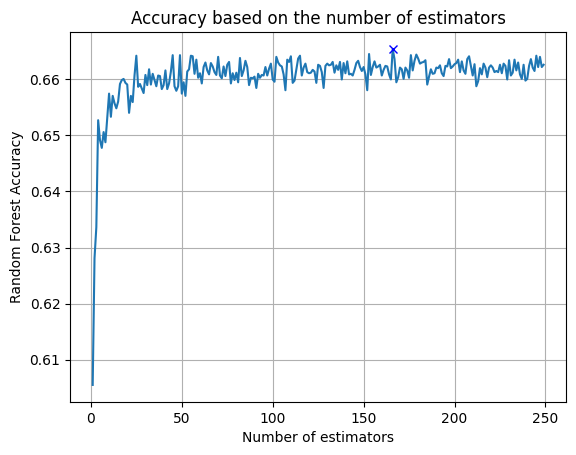

We find a max accuracy of 0.6654222580970639 at 166 Number of esimators


In [78]:
plt.plot(nvals, acc)
plt.plot(acc.index(max(acc)) + 1 ,max(acc),"bx")
plt.xlabel('Number of estimators')
plt.ylabel('Random Forest Accuracy')
plt.grid()
plt.title('Accuracy based on the number of estimators')
plt.show()
print(f"We find a max accuracy of {max(acc)} at {acc.index(max(acc)) + 1} Number of esimators")

Lets find the best maximum depth

In [80]:
ndepth = range(1,50)
accd = []
for n in ndepth:
  RFmodel = RandomForestClassifier(n_estimators=acc.index(max(acc)) , n_jobs=-1, max_depth=n)
  RFmodel.fit(x_train, y_train)  
  y_pred = RFmodel.predict(x_test)
  accd.append(metrics.accuracy_score(y_test, y_pred))

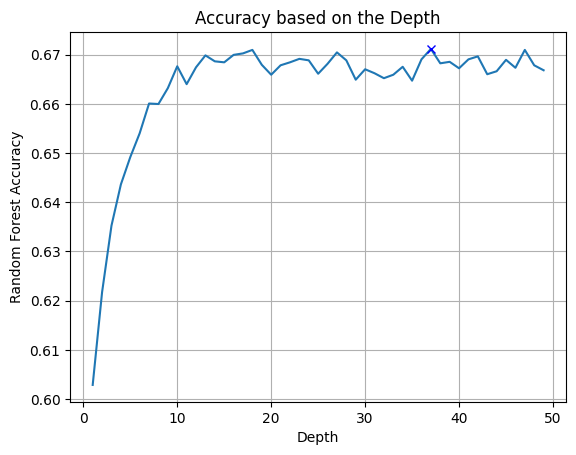

We find a max accuracy of 0.6711734436484714 at a depth of 37


In [81]:
plt.plot(ndepth, accd)
plt.plot(accd.index(max(accd)) + 1,max(accd),"bx")
plt.xlabel('Depth')
plt.ylabel('Random Forest Accuracy')
plt.grid()
plt.title('Accuracy based on the Depth')
plt.show()
print(f"We find a max accuracy of {max(accd)} at a depth of {accd.index(max(accd)) + 1}")

Lets verify this finding using cross validation.

In [83]:
RFmodel = RandomForestClassifier(n_estimators=acc.index(max(acc)) + 1,max_depth=accd.index(max(accd)) + 1, n_jobs=-1)
RFscore = cross_val_score(RFmodel,x_train,y_train,scoring="accuracy",cv=5).mean()
RFscore

0.6645141908588088

Therefore with a 166 estimators and a depth of 37 we find an average accuracy of 66%

## Linear Discriminant Analysis

In [85]:
LDmodel = LinearDiscriminantAnalysis()
LDscore = cross_val_score(LDmodel, x_train, y_train, scoring='accuracy', cv=5).mean()
LDscore

0.6423840629224479

We find an average accuracy of 64%

## Knn

In [93]:
nneighbours = range(1,50)
accknn = []
for n in nneighbours:
    KNNmodel = KNeighborsClassifier(n_neighbors=n,n_jobs=-1)
    KNNmodel.fit(x_train,y_train)
    y_pred = KNNmodel.predict(x_test)
    accknn.append(metrics.accuracy_score(y_test,y_pred))

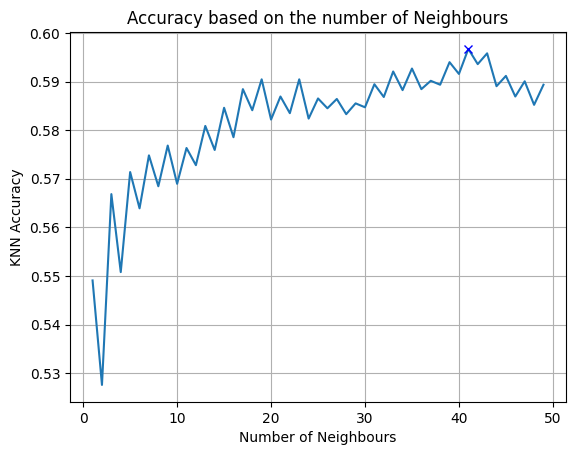

We find a max accuracy of 0.5967107254565635 for 41 neighbours


In [95]:
plt.plot(nneighbours, accknn)
plt.plot(accknn.index(max(accknn)) + 1,max(accknn),"bx")
plt.xlabel('Number of Neighbours')
plt.ylabel('KNN Accuracy')
plt.grid()
plt.title('Accuracy based on the number of Neighbours')
plt.show()
print(f"We find a max accuracy of {max(accknn)} for {acc.index(max(accknn)) + 1} neighbours")

We proceed to a cross validation

In [112]:
KNNmodel = KNeighborsClassifier(n_neighbors=acc.index(max(accknn)) + 1)
KNNscore = cross_val_score(KNNmodel, x_train, y_train, scoring='accuracy', cv=5).mean()
KNNscore

0.5783475583824851

## Naïve Bayes

In [96]:
NBmodel = GaussianNB()
NBscore = cross_val_score(NBmodel, x_train, y_train, scoring='accuracy', cv=5).mean()
NBscore

0.5130325273179144

## Ada Boosting

In [98]:
nvals=range(1,252,10)
accAda=[]
for n in nvals:
    Adamodel = AdaBoostClassifier(n_estimators=n, random_state=0)
    Adamodel.fit(x_train, y_train)  
    y_pred = Adamodel.predict(x_test)
    accAda.append(metrics.accuracy_score(y_test, y_pred))


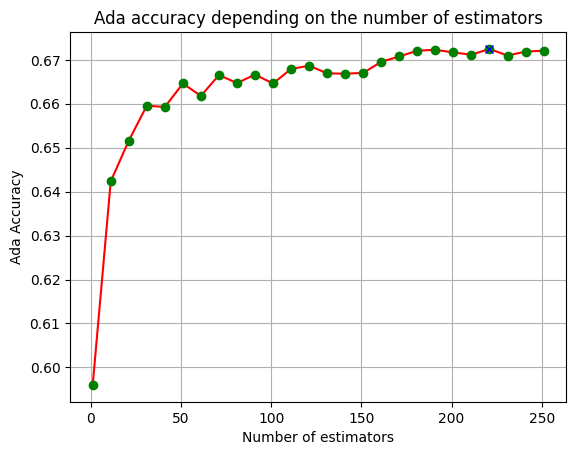

We find a max accuracy of 0.6724851175461608 for 221 number of estimators


In [108]:
plt.plot(nvals, accAda, 'r-')
plt.plot(nvals, accAda, 'go')
plt.plot(accAda.index(max(accAda))*10 +1,max(accAda),"bx")
plt.xlabel('Number of estimators')
plt.ylabel('Ada Accuracy')
plt.grid()
plt.title('Ada accuracy depending on the number of estimators')
plt.show()
print(f"We find a max accuracy of {max(accAda)} for {accAdaAda.index(max(accAda)) *10 + 1} number of estimators")

We verify it with cross validation.

In [110]:
Adamodel = AdaBoostClassifier(n_estimators=accAda.index(max(accAda))*10 + 1)
Adascore = cross_val_score(Adamodel, x_train, y_train, scoring='accuracy', cv=5).mean()
Adascore

0.6610498692028491

Now that we have tested all models, we can make a dataframe to compare them by doing a plot.

In [113]:
df_models=pd.DataFrame()
df_models['Name']= ["Logistic Regression","Decision Tree","Random Forests","LinearDiscriminantAnalysis","KNN","Naïve Bayes","Ada Boost"]
df_models['Score']= [LRscore, DTscore, RFscore, LDscore, KNNscore, NBscore, Adascore]

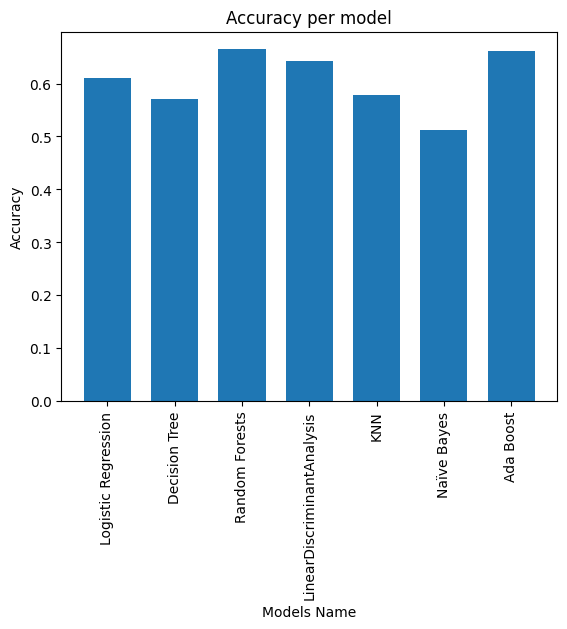

In [116]:
plt.bar(df_models['Name'], df_models['Score'], width=0.7)
plt.xticks(rotation = 90)
plt.title('Accuracy per model')
plt.xlabel('Models Name')
plt.ylabel('Accuracy')
plt.show()

Thanks to this graph, we conclude that Random Forests is the most fitting model for our dataset with an accuracy of 66,5%. We shall therefore implement this model into our API.